<a href="https://colab.research.google.com/github/andreaeusebi/pytorch_for_deep_learning/blob/main/notebooks/02_pytorch_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. PyTorch Neural Network Classification

## 1. Collect Data and make it ready

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [ ]:
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(1000, 2)


In [ ]:
# Make a DataFrame of circle data
import pandas as pd

In [ ]:
circles = pd.DataFrame({"X1"    : X[:, 0],
                        "X2"    : X[:, 1],
                        "label" : y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


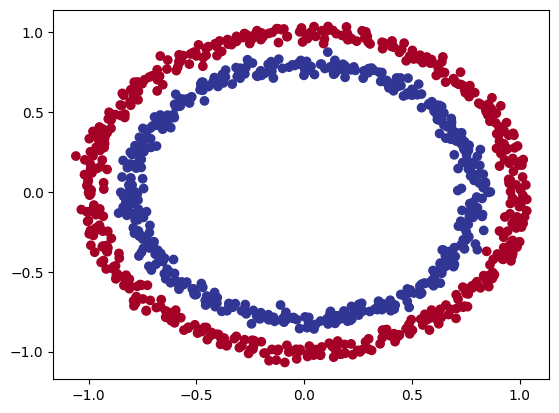

In [ ]:
# Visualize graphically
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

### Check input and output shapes

In [ ]:
print(type(X))
print(X.dtype)
print(type(y))
print(X.shape, y.shape)

<class 'numpy.ndarray'>
float64
<class 'numpy.ndarray'>
(1000, 2) (1000,)


### Turn into tensors and create train and test splits

In [ ]:
import torch
print(torch.__version__)

2.1.0+cu121


In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
print(X.shape, y.shape)
print(X.dtype, y.dtype)

torch.Size([1000, 2]) torch.Size([1000])
torch.float32 torch.float32


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.2 is a percentage
                                                    random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
print(X_train.shape, type(X_train))

torch.Size([800, 2]) <class 'torch.Tensor'>


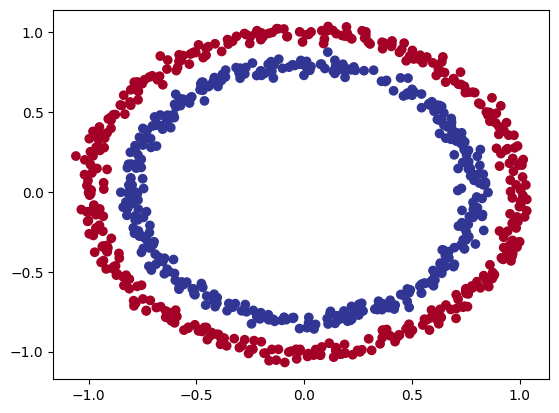

In [ ]:
plt.scatter(x=X_train[:,0],
            y=X_train[:,1],
            c=y_train,
            cmap=plt.cm.RdYlBu);

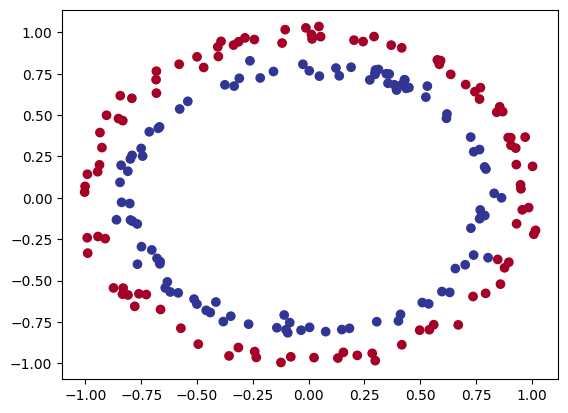

In [ ]:
plt.scatter(x=X_test[:,0],
            y=X_test[:,1],
            c=y_test,
            cmap=plt.cm.RdYlBu);

## 2. Building a model

In [ ]:
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
print(f"Device: {device}")

Device: cuda


In [ ]:
## 1. Costruct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    ## 2. Create 2 nn.Linear layers cabale of handling the shapes of our data

    # layer_1 is an hidden layer
    self.layer_1 = nn.Linear(in_features=2,
                             out_features=5)

    # in features size must match size of previous layer out features
    # layer_2 is the output layer
    self.layer_2 = nn.Linear(in_features=5,
                             out_features=1)

      ### USING nn.Sequential() ####
      # self.two_linear_layers = nn.Sequential(
      #     nn.Linear(in_features=2, out_features=5),
      #     nn.Linear(in_features=5, out_features=1) )

  ## 3. Define a forward method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2

    ### USING nn.Sequential() ####
      # return self.two_linear_layers(x)

In [ ]:
## 4. Instantiate an instance of the model class and send it to the target device
model_0 = CircleModelV0().to(device)

In [ ]:
print(model_0)
print(next(model_0.parameters()).device)

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)
cuda:0


### Let's replicate the model above using nn.Sequential()

In [ ]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1253,  0.5221],
                      [-0.6153,  0.1146],
                      [-0.2875,  0.1366],
                      [-0.0177,  0.4695],
                      [ 0.6188,  0.1142]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.4124, -0.4791,  0.0352,  0.6132, -0.0945], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0757,  0.3964, -0.3358,  0.1388,  0.4258]], device='cuda:0')),
             ('1.bias', tensor([-0.3655], device='cuda:0'))])

In [ ]:
# Make predictions
model_0.eval()

with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(len(untrained_preds), untrained_preds.shape)

200 torch.Size([200, 1])


### Setup loss function and optimizer

Which loss function or optimizer should you use?
Again... this is problem specific.

Loss:

For regression: MAE or MSE

Classification: Binary Cross Entropy or Categorical Cross Entropy

Optimizer:

Most common: SGD and Adam

In [ ]:
loss_fn = nn.BCEWithLogitsLoss() # this has the sigmoid activation function built-in

optimizer = torch.optim.SGD(model_0.parameters(),
                            lr = 0.1)

In [ ]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = ( correct / len(y_pred) ) * 100
  return acc

## 3. Training a model

### Going from raw logits -> prediction probabilities -> prediction labels

Model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of *activation function* (e.g. *sigmoid* for binary classification, and *sofmax* for multiclass classification)

Then we can convert our model's prediction probabilities into **prediction labels** by either rounding them (binary class) or taking the *argmax()* (multiclass).

In [ ]:
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]

y_logits

tensor([[-0.5494],
        [-0.4808],
        [-0.6633],
        [-0.5174],
        [-0.5589]], device='cuda:0')

In [ ]:
# use the sigmoid function
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3660],
        [0.3821],
        [0.3400],
        [0.3735],
        [0.3638]], device='cuda:0')

For our prediction probability values we need to perform a range-style rounding on them (*decision boundary*).

In [ ]:
y_preds = torch.round(y_pred_probs)
y_preds

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

### Building a training loop


In [ ]:
torch.manual_seed(42)
# torch.cuda.manual_seed(42)

# epochs
epochs = 100

# data into device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### TRAINING ###
  model_0.train()

  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  ## PASS LOGITS TO LOSS FN SINCE IT HAS SIGMOID INTEGRATED
  loss = loss_fn(y_logits, y_train)

  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ### TESTING ###
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.73146, Accuracy: 50.00% | Test loss: 0.73034, Test acc: 50.00%
Epoch: 10 | Loss: 0.70649, Accuracy: 50.00% | Test loss: 0.70936, Test acc: 50.00%
Epoch: 20 | Loss: 0.69829, Accuracy: 47.62% | Test loss: 0.70281, Test acc: 43.00%
Epoch: 30 | Loss: 0.69551, Accuracy: 46.88% | Test loss: 0.70066, Test acc: 47.50%
Epoch: 40 | Loss: 0.69449, Accuracy: 49.12% | Test loss: 0.69981, Test acc: 46.50%
Epoch: 50 | Loss: 0.69405, Accuracy: 49.75% | Test loss: 0.69933, Test acc: 47.00%
Epoch: 60 | Loss: 0.69382, Accuracy: 50.00% | Test loss: 0.69894, Test acc: 46.00%
Epoch: 70 | Loss: 0.69367, Accuracy: 50.62% | Test loss: 0.69860, Test acc: 46.50%
Epoch: 80 | Loss: 0.69356, Accuracy: 50.38% | Test loss: 0.69828, Test acc: 46.50%
Epoch: 90 | Loss: 0.69347, Accuracy: 50.75% | Test loss: 0.69799, Test acc: 45.50%


## 4. Make predictions and evaluate the model

In [ ]:
import requests
from pathlib import Path

# Download helper function from LearnPyTorch repo

if Path("helper_functions.py").is_file():
  print("Already exists")
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


from helper_functions import plot_predictions, plot_decision_boundary

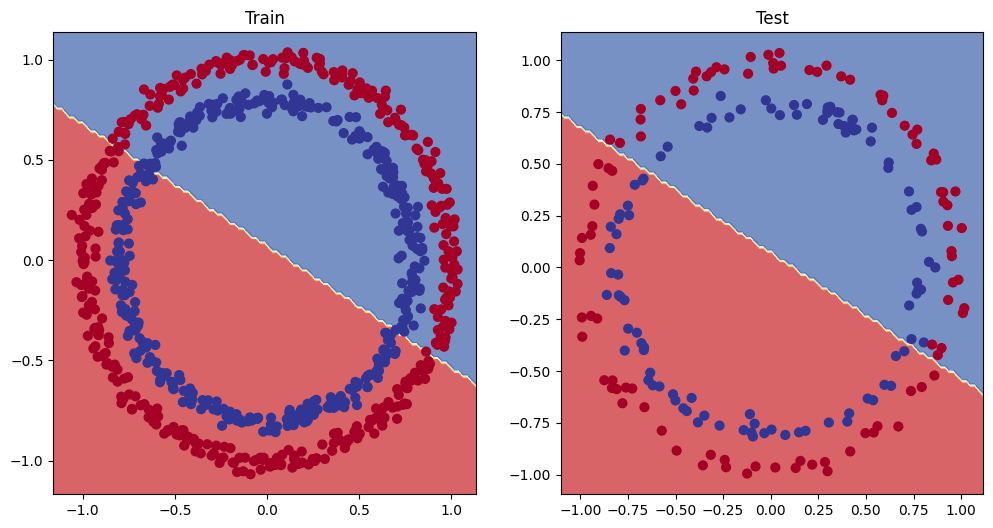

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")

plot_decision_boundary(model=model_0,
                       X=X_train,
                       y=y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model

*Notes not taken for this chapter*

## 6. Adding non linearity

In [ ]:
# Build a model with non linear activation functions

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2,
                             out_features=10)

    self.layer_2 = nn.Linear(in_features=10,
                             out_features=10)

    # output layer (one output)
    self.layer_3 = nn.Linear(in_features=10,
                             out_features=1)

    self.relu = nn.ReLU() # relu is a non linear activation function (like sigmoid)

  def forward(self, x):
    # where should we put our non linear activation function?
    # -> let's put one relu in between each layer

    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [ ]:
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

### Build training loop

In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [ ]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%


### Evaluating a model trained with non linear activation functions

In [ ]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10] # want preds in same format as truth labels

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

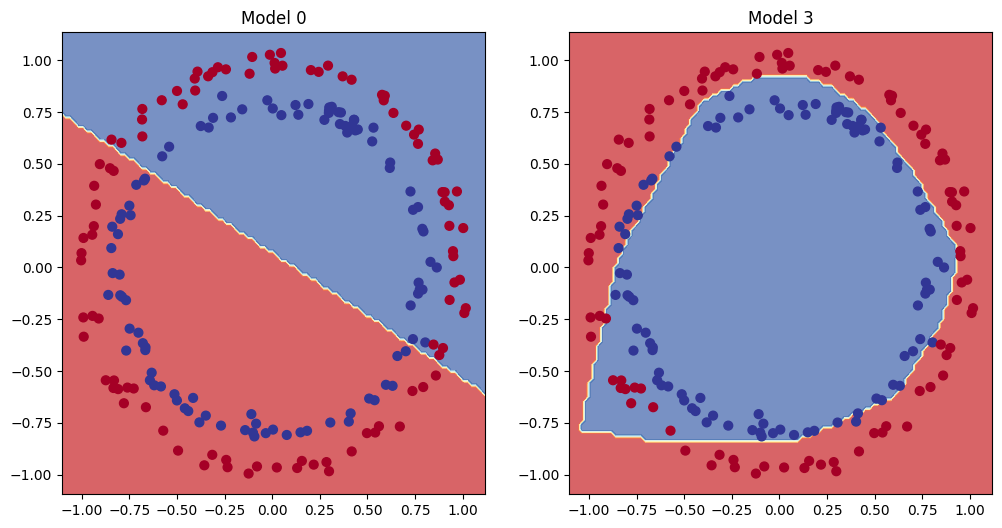

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Model 0")
plot_decision_boundary(model_0, X_test, y_test) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Model 3")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

## 7. Replicating non-linear activation functions

## 8. Putting things together by building a multi-class PyTorch model